In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
N = 10
X = np.linspace(-5,5,N)

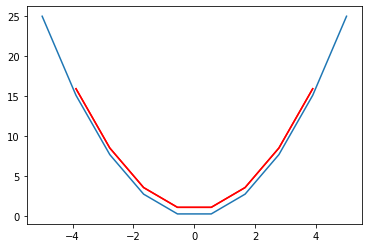

In [62]:
plt.plot(X,X**2)
plt.plot(np.convolve(X,K)[2:-2], np.convolve(X*X, K)[2:-2], 'r')
plt.plot(np.convolve(X,K)[2:-2], np.convolve(X*X, K)[2:-2], 'r')

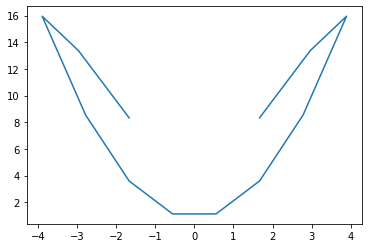

In [63]:
K = np.ones(3)/3

plt.plot(np.convolve(X,K), np.convolve(X*X, K))

In [64]:
VK = np.zeros_like(X)
VK[:3] = 1
VK

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
MK = np.vstack([np.roll(VK, N-1 + k) for k in range(N)])
MK

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

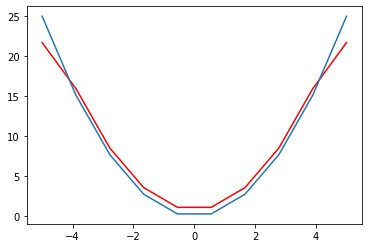

In [77]:
plt.plot( X, np.dot(MK/3, X*X),'r')
plt.plot(X, X*X)


In [75]:
mm = np.linalg.inv(MK)*3 
mm


array([[ 1.,  1., -2.,  1.,  1., -2.,  1.,  1., -2.,  1.],
       [ 1.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1., -2.],
       [-2.,  1.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.],
       [ 1., -2.,  1.,  1.,  1., -2.,  1.,  1., -2.,  1.],
       [ 1.,  1., -2.,  1.,  1.,  1., -2.,  1.,  1., -2.],
       [-2.,  1.,  1., -2.,  1.,  1.,  1., -2.,  1.,  1.],
       [ 1., -2.,  1.,  1., -2.,  1.,  1.,  1., -2.,  1.],
       [ 1.,  1., -2.,  1.,  1., -2.,  1.,  1.,  1., -2.],
       [-2.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.,  1.],
       [ 1., -2.,  1.,  1., -2.,  1.,  1., -2.,  1.,  1.]])

In [80]:
mm[mm> 0 ] = 0

In [70]:
np.linalg.eigvals(MK/3)

array([-0.33333333, -0.20601133,  0.127322  ,  0.53934466,  1.        ,
        0.872678  ,  0.872678  ,  0.53934466,  0.127322  , -0.20601133])

# Exo

what happens when ```N % 3 = 0```

---

# The edge detection kernel

- in dimension 1

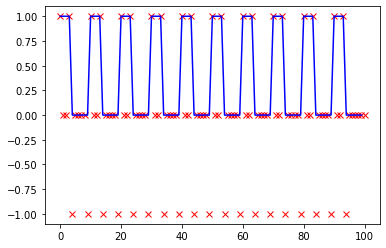

In [142]:
def f(x):
    return x % 10 in [0,1,2,3]

K = np.array([-1,2,-1])

X = np.arange(100).astype(int)
Y = np.zeros_like(X)
Y[[f(k) for k in X  ]] = 1


YK = np.convolve(Y, K)[1:]
plt.plot(np.arange(len(YK)), YK,'rx' )
plt.plot(np.arange(len(Y)), Y, 'b');


In [131]:
VK = np.zeros_like(X)
VK[:3] = K
N = len(X)
MK = np.vstack([np.roll(VK,  k) for k in range(N)])
MK

array([[-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  2, -1],
       [-1,  0,  0, ...,  0, -1,  2],
       [ 2, -1,  0, ...,  0,  0, -1]])

In [132]:
np.linalg.det(MK)

-1.1147087742196192e-13

In [133]:
np.linalg.det(MK.astype(int))

-1.1147087742196192e-13

In [136]:
from scipy.linalg import null_space

ker = null_space(MK)
ker.shape

(100, 1)

In [141]:
ker[:,0]

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])